## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from glob import glob # serve para listar os arquivos das imagens

# Bibliotecas para imagens
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pylab as pltlab

## Reading images

### Listing Images

In [2]:
# test
test_datasets = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\*jpg')
dry_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\dry\*jpg')
normal_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\normal\*jpg')
oily_skins_for_test = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\test\oily\*jpg')

# Train
train_datasets = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\*jpg')
dry_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\dry\*jpg')
normal_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\normal\*jpg')
oily_skins_for_train = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\train\oily')

# Valid
validation_datasets = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\*jpg')
dry_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\dry\*jpg')
normal_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\normal\*jpg')
oily_skins_valid = glob(r'C:\Users\fatima\Documents\programs\Projetos\Skin_types\skin_search\valid\oily\*jpg')

In [3]:
dataset_dir = os.path.join(os.getcwd(), 'skin_search')


dataset_test_dir = os.path.join(dataset_dir, 'test')
dataset_test_dry_len = len(os.listdir(os.path.join(dataset_test_dir, 'dry')))
dataset_test_normal_len = len(os.listdir(os.path.join(dataset_test_dir, 'normal')))
dataset_test_oily_len = len(os.listdir(os.path.join(dataset_test_dir, 'oily')))

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_dry_len = len(os.listdir(os.path.join(dataset_train_dir, 'dry')))
dataset_train_normal_len = len(os.listdir(os.path.join(dataset_train_dir, 'normal')))
dataset_train_oily_len = len(os.listdir(os.path.join(dataset_train_dir, 'oily')))

dataset_validation_dir = os.path.join(dataset_dir, 'valid')
dataset_validation_dry_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dry')))
dataset_validation_normal_len = len(os.listdir(os.path.join(dataset_validation_dir, 'normal')))
dataset_validation_oily_len = len(os.listdir(os.path.join(dataset_validation_dir, 'oily')))

print('-------------- QUANTIDADE DE IMAGENS -------------')
print('\n\nTest dry: %s' % dataset_test_dry_len)
print('Test normal: %s' % dataset_test_normal_len)
print('Test oily: %s' % dataset_test_oily_len)
print('--------------------------------------------------')
print('Train dry: %s' % dataset_train_dry_len)
print('Train normal: %s' % dataset_train_normal_len)
print('Train oily: %s' % dataset_train_oily_len)
print('--------------------------------------------------')
print('Validation dry: %s' % dataset_validation_dry_len)
print('Validation normal: %s' % dataset_validation_normal_len)
print('Validation oily: %s' % dataset_validation_oily_len)

-------------- QUANTIDADE DE IMAGENS -------------


Test dry: 35
Test normal: 59
Test oily: 40
--------------------------------------------------
Train dry: 652
Train normal: 1105
Train oily: 1000
--------------------------------------------------
Validation dry: 71
Validation normal: 111
Validation oily: 80


### Pixel values from the images

In [4]:
img_plt = plt.imread(dry_skins_for_test[1])

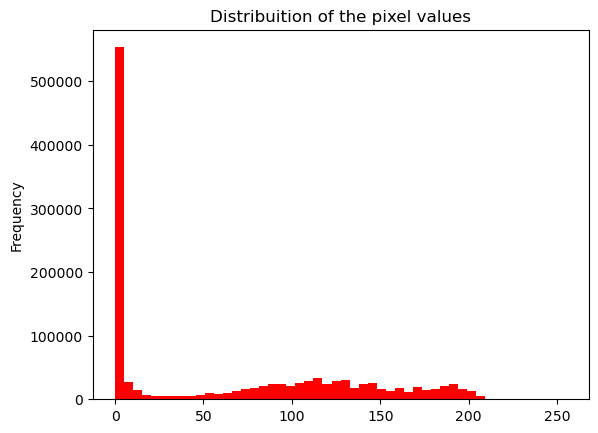

In [5]:
pd.Series(img_plt.flatten()).plot(kind='hist', bins=50, color = 'red',
                                  title='Distribuition of the pixel values')
plt.show()

## Image preprocessing for model training

In [7]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
img_shape = image_size + (image_color_channel,)

batch_size = 32 # quantidade de features q eu vou trazer por vez do meu dataset
epochs = 20 # número de vezes em que eu vou passar pelo meu dataset inteiro
learning_rate = 0.0001

class_names = ['dry', 'normal', 'oily']

In [8]:
dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 134 files belonging to 3 classes.


In [9]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2757 files belonging to 3 classes.


In [10]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 262 files belonging to 3 classes.


In [11]:
# Caso eu não tivesse um dataset de testes e precisasse criá-lo proderiamos fazer isso da seguinte forma:

dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 8
Test Dataset Cardinality: 1


## Dataset Images Plot

In [12]:
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

<Figure size 640x480 with 0 Axes>

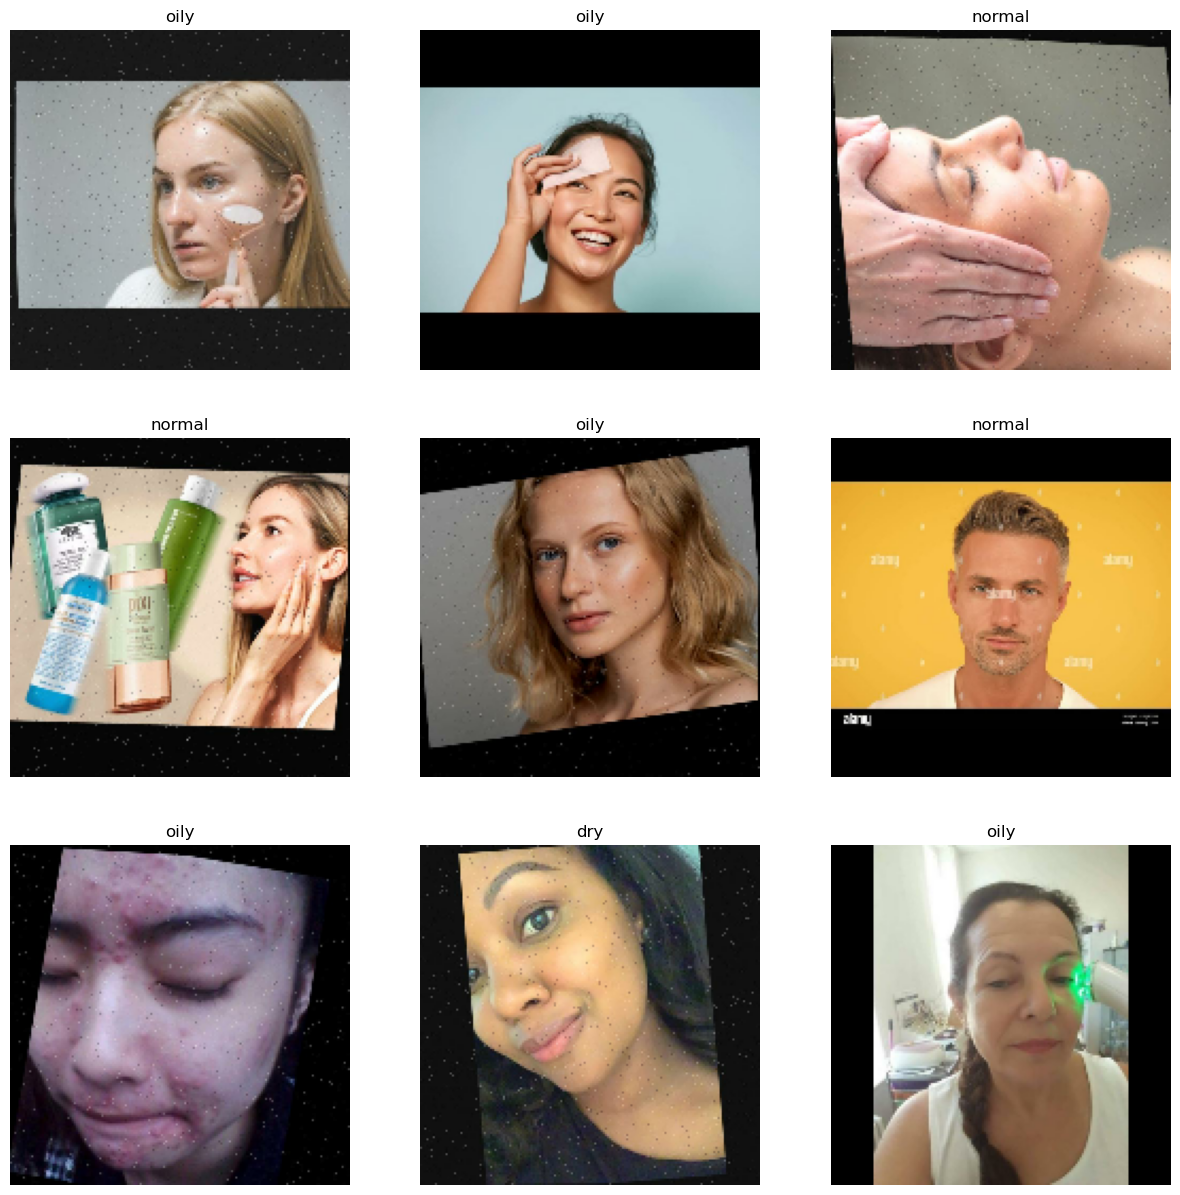

In [13]:
plot_dataset(dataset_train)

<Figure size 640x480 with 0 Axes>

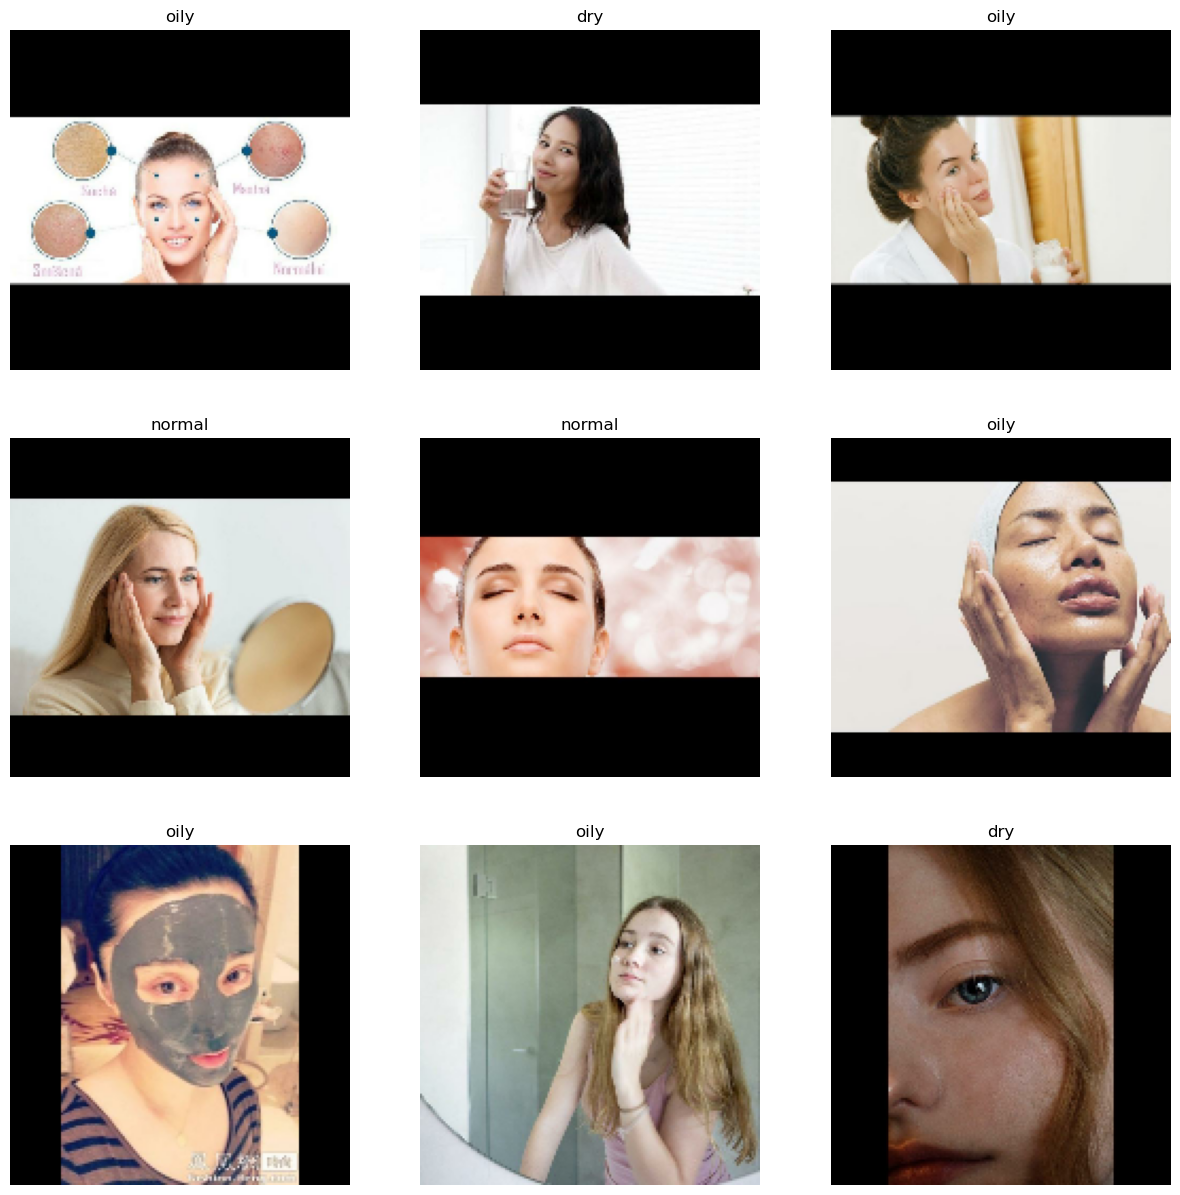

In [14]:
plot_dataset(dataset_test)

<Figure size 640x480 with 0 Axes>

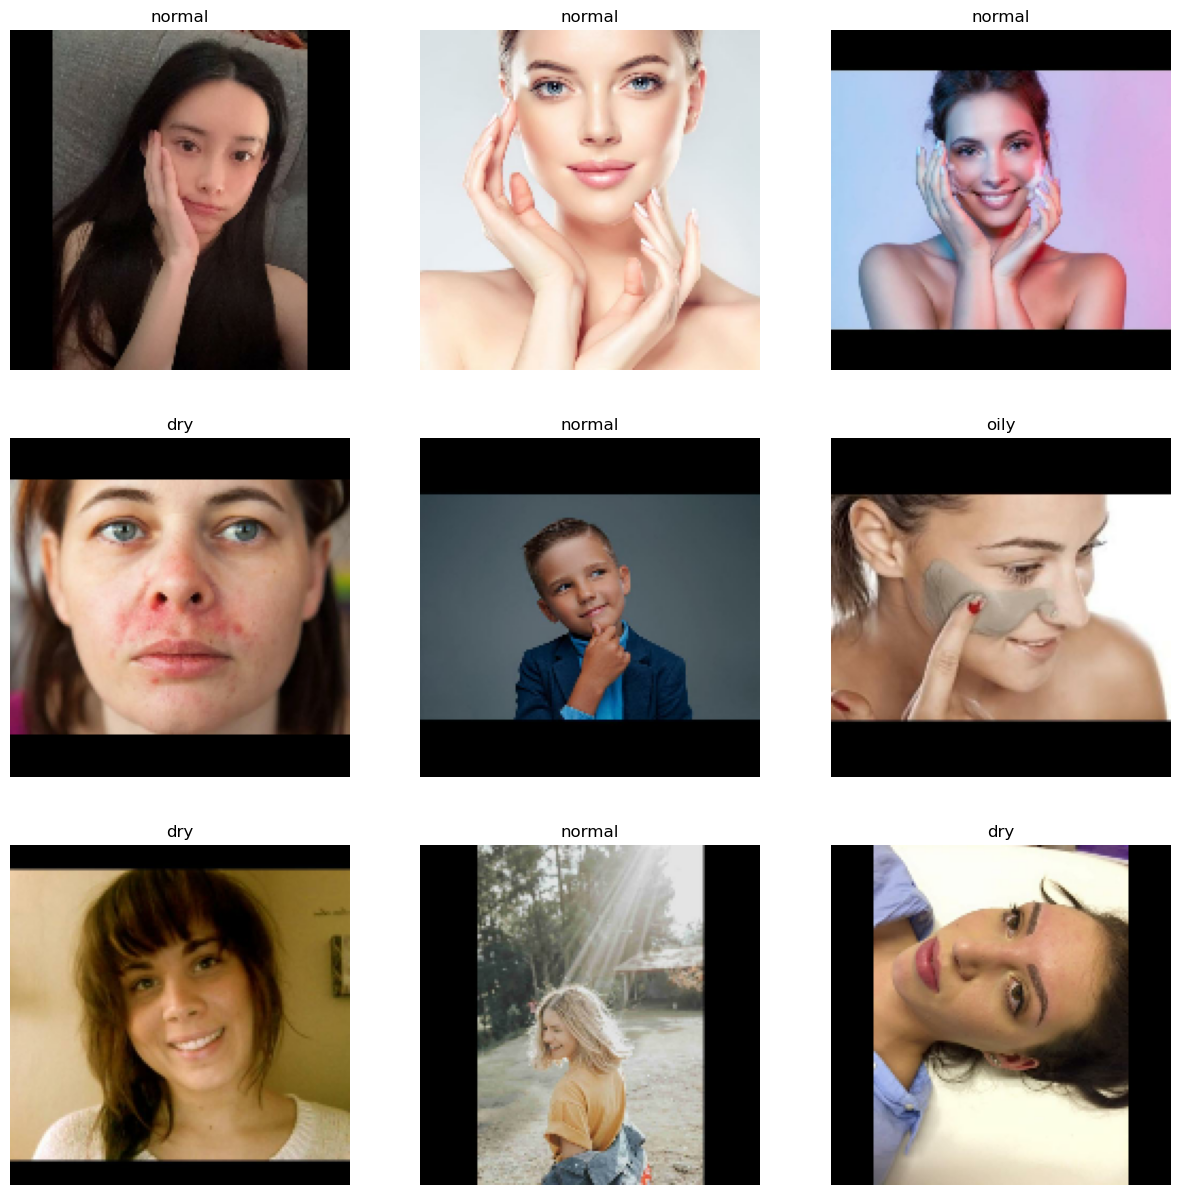

In [15]:
plot_dataset(dataset_validation)

# Creating a Machine Learning Supervised Learning model - type Image Classification

### Model

In [45]:
# PS: A neural network without any activation function would not be able to realize 
# such complex mappings mathematically and would not be able to solve tasks we want 
# the network to solve.

model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1.0 / image_color_channel_size, 
                              input_shape=img_shape),
    
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation = 'relu'), # arrumar isso pq senão só vai retornar 2 e eu preciso de 3
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 160, 160, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 80, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,300,899 (12.59 MB)

 Trainable params: 3,300,899 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1.0 / image_color_channel_size, 
                              input_shape=img_shape),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Alterada para 3 classes
])

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)


model2.summary()


C:\Users\fatima\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_9 (Rescaling)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 160, 160, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 80, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,300,899 (12.59 MB)

 Trainable params: 3,300,899 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [53]:
model.fit(dataset_train, train_labels, epochs=10)  # Ajuste o número de épocas conforme necessário


NameError: name 'train_labels' is not defined

In [51]:
history = model2.fit(
    y_train_encode,
    y_validation_encoded=dataset_validation,
    epochs=epochs
)

NameError: name 'y_train_encode' is not defined

In [35]:
# Pré-processamento dos rótulos (exemplo)
y_train_encoded = tf.keras.utils.to_categorical(dataset_test, num_classes=3)
y_val_encoded = tf.keras.utils.to_categorical(dataset_validation, num_classes=3)

TypeError: int() argument must be a string, a bytes-like object or a real number, not '_TakeDataset'

In [38]:
model2 = tf.keras.models.Sequential([

    tf.keras.layers.Rescaling(1.0 / image_color_channel_size, 
                              input_shape=img_shape),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')  # Alterada para 3 classes
])


In [28]:
def plot_data_set_predictions(dataset):

    features, labels = dataset.as_numpy_iterator().next()

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < 0.5, 0, 1)

    print('labels:       %s' % labels)
    print('predictions:  %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15,15))

    for i in range (9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

In [40]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 160, 160, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 80, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,300,899 (12.59 MB)

 Trainable params: 3,300,899 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
history = model2.fit(
    dataset_train,
    validation_data=dataset_validation,
    epochs=epochs
)

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 3)

labels:       [1 1 2 1 2 2 0 2 1 1 1 2 0 1 0 1 2 1 2 1 2 1 1 2 0 1 2 2 0 2 2 1]
predictions:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<Figure size 640x480 with 0 Axes>

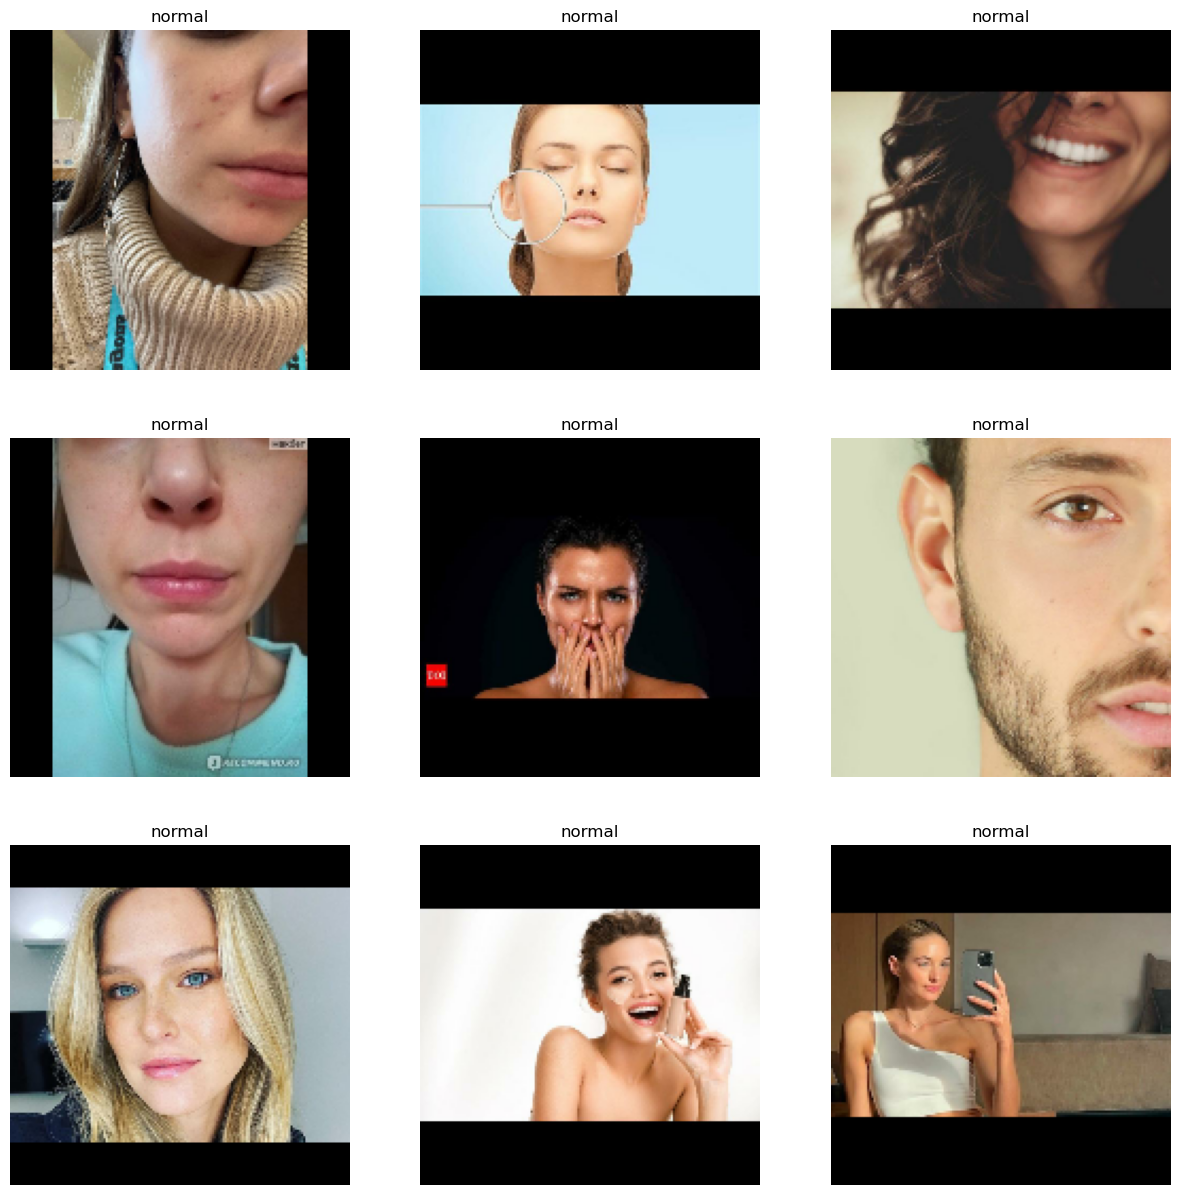

In [29]:
plot_data_set_predictions(dataset_test)